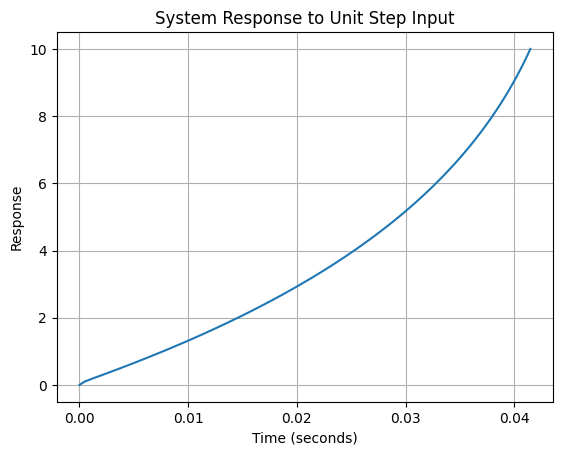

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from control.matlab import lsim
import control

num1 = [2.171]
den1 = [1, 0.1512]
num2 = [0.0781, 9.636e-4]
den2 = [1, 19.38, 0.5134]
delay = 15
sys1 = control.TransferFunction(num1, den1)
sys2 = control.TransferFunction(num2, den2)
sys = control.series(sys1, sys2)
# 创建帕德逼近的延迟模型

# 转换为状态空间形式
sys = control.tf2ss(sys)

# 定义时间向量和输入信号（例如，单位阶跃信号）
t = np.linspace(0, 10, 100)  # 时间从0到10秒
u = np.ones_like(t)  # 输入是单位阶跃信号

# 使用lsim计算系统响应
t_out, y_out, _ = lsim(sys, U=u, T=t)

# 绘制系统响应
plt.plot(t_out, y_out)
plt.xlabel('Time (seconds)')
plt.ylabel('Response')
plt.title('System Response to Unit Step Input')
plt.grid(True)
plt.show()